# 3. Models Ensemble - Final model

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np 
from bokeh.plotting import show, figure
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
data = pd.read_csv("Family_Income_and_Expenditure.csv") 

## Best LR model

In [32]:
# spliting data in numeric and text
colnumber = len(data.columns)
data_number = pd.DataFrame()
data_text = pd.DataFrame()
for i in range(colnumber):
    if data.dtypes[i] == "int64":
        data_number[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])
    else:
        data_text[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])

In [33]:
data_choose = data[["Region", "Main Source of Income", "Household Head Sex", "Household Head Marital Status", 
                         "Household Head Class of Worker", "Type of Household", "Agricultural Household indicator"]]
data_choose_recode = pd.get_dummies(data_choose)
data_number = data_number.drop(["Agricultural Household indicator"], axis=1)

data_total = pd.DataFrame()
data_total = pd.concat([data_number, data_choose_recode], axis = 1)

In [34]:
# split data in train and test sets
np.random.seed(42)
mask = np.random.rand(data_total.shape[0]) <= 0.7
print('Train set shape {0}, test set shape {1}'.format(data_total[mask].shape, data_total[~mask].shape))

Train set shape (29197, 83), test set shape (12347, 83)


In [35]:
lr = LinearRegression()
lr.fit(data_total.iloc[mask, 1:], data_total[mask]["Total Household Income"])
lr_pred = lr.predict(data_total.iloc[~mask, 1:])
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((lr_pred - data_total[~mask]["Total Household Income"])**2))))

RMSE = 152414.3327


## RF 1 model

In [7]:
# spliting data in numeric and text
colnumber = len(data.columns)
data_number = pd.DataFrame()
data_text = pd.DataFrame()
for i in range(colnumber):
    if data.dtypes[i] == "int64":
        data_number[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])
    else:
        data_text[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])

In [8]:
data_number_a = pd.get_dummies(data_number, columns=["Agricultural Household indicator"])

In [9]:
np.random.seed(42)
mask = np.random.rand(data_number_a.shape[0]) <= 0.7
print('Train set shape {0}, test set shape {1}'.format(data_number_a[mask].shape, data_number_a[~mask].shape))

Train set shape (29197, 47), test set shape (12347, 47)


In [10]:
rf1 = RandomForestRegressor(n_estimators=50, random_state = 42)
rf1.fit(data_number_a[mask].drop(["Total Household Income"], axis=1),
       data_number_a[mask]["Total Household Income"])
rf1_pred = rf1.predict(data_number_a[~mask].drop(["Total Household Income"], axis=1))
print('RMSE_scaled = {0:.04f}'.format(np.sqrt(np.mean((rf1_pred - data_number_a[~mask]["Total Household Income"])**2))))

RMSE_scaled = 151335.4597


## RF 2 model

In [11]:
# spliting data in numeric and text
colnumber = len(data.columns)
data_number = pd.DataFrame()
data_text = pd.DataFrame()
for i in range(colnumber):
    if data.dtypes[i] == "int64":
        data_number[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])
    else:
        data_text[[data.columns[i]]] = pd.DataFrame(data.iloc[:,i])

In [12]:
data_text_recode = pd.get_dummies(data_text)
data_number_a = pd.get_dummies(data_number, columns=["Agricultural Household indicator"])

data_total = pd.DataFrame()
data_total = pd.concat([data_number_a, data_text_recode], axis = 1)

In [13]:
# split data in train and test sets
np.random.seed(42)
mask = np.random.rand(data_total.shape[0]) <= 0.7
print('Train set shape {0}, test set shape {1}'.format(data_total[mask].shape, data_total[~mask].shape))

Train set shape (29197, 557), test set shape (12347, 557)


In [14]:
rf2 = RandomForestRegressor(n_estimators=60, max_depth = 15, random_state = 42)
rf2.fit(data_total[mask].drop(["Total Household Income"], axis=1),
       data_total[mask]["Total Household Income"])
rf2_pred = rf2.predict(data_total[~mask].drop(["Total Household Income"], axis=1))
print('RMSE = {0:.04f}'.format(np.sqrt(np.mean((rf2_pred - data_total[~mask]["Total Household Income"])**2))))

RMSE = 149886.3949


## Final Model

In [59]:
income = pd.DataFrame(data_total[~mask]["Total Household Income"]).reset_index().drop("index", axis = 1)
lr_pred = pd.DataFrame(lr_pred, columns=["lr_pred"])
rf1_pred = pd.DataFrame(rf1_pred, columns=["rf1_pred"])
rf2_pred = pd.DataFrame(rf2_pred, columns=["rf2_pred"])

final = pd.concat([income, lr_pred, rf1_pred, rf2_pred], axis = 1)
final

,Total Household Income,lr_pred,rf1_pred,rf2_pred
0,198235,253903.072996,231874.84,237421.954053
1,82785,129893.877662,108164.72,112797.917766
2,134961,156142.487202,188385.80,203438.167107
3,625753,485670.165417,414648.60,431552.899230
4,253130,323624.603410,225190.50,219146.161181
...,...,...,...,...
12342,95500,110049.347839,124007.76,129269.831595
12343,185100,210920.560995,247591.64,247971.289437
12344,119773,73945.690837,120135.14,115602.250490
12345,133171,83284.197325,128728.64,125611.397538


In [60]:
# split data in train and test sets
np.random.seed(42)
mask = np.random.rand(final.shape[0]) <= 0.7
print('Train set shape {0}, test set shape {1}'.format(final[mask].shape, final[~mask].shape))

Train set shape (8729, 4), test set shape (3618, 4)


In [62]:
final.iloc[mask, 1:]

,lr_pred,rf1_pred,rf2_pred
0,253903.072996,231874.84,237421.954053
3,485670.165417,414648.60,431552.899230
4,323624.603410,225190.50,219146.161181
5,97998.374095,131276.62,142045.383574
6,89120.957870,113172.68,112122.876123
...,...,...,...
12341,152826.896307,142730.20,149818.596509
12342,110049.347839,124007.76,129269.831595
12343,210920.560995,247591.64,247971.289437
12344,73945.690837,120135.14,115602.250490


In [69]:
lr_final = LinearRegression()
lr_final.fit(final.iloc[mask, 1:], final[mask]["Total Household Income"])
lr_pred_final = lr_final.predict(final.iloc[~mask, 1:])
print('RMSE = {0:.02f}'.format(np.sqrt(np.mean((lr_pred_final - final[~mask]["Total Household Income"])**2))))

RMSE = 103349.55


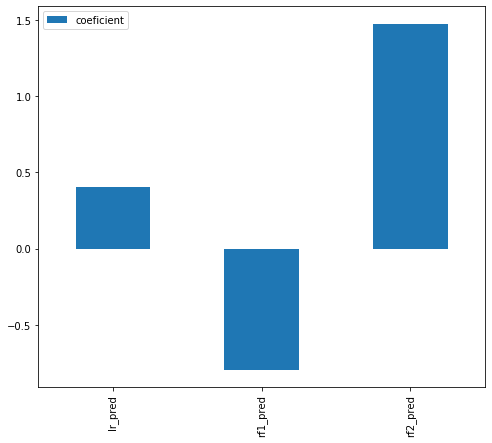

In [68]:
pd.DataFrame(lr_final.coef_, columns=['coeficient'], 
             index=final[mask].drop(["Total Household Income"], 
                                    axis=1).columns,).plot(kind='bar', figsize=(8,7))

RMSE = 103 349.55 it is the best result.